# Description

The **statistical power** of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true.

$$\text{power} = Pr\ [\text{reject } H_0\ |\ H_1 \text{ is true}]$$

### t-tests and t-values

t-tests are hypothesis tests that allow you to compare means.

$$t = \frac{\bar{x} - \mu_0}{\sigma / n}$$

**Numerator:** Distance between sample mean and null hypothesis
**Denominator:** Standard error of mean

Given degrees of freedom we can generate an associated t-distribution with which our t-value can give us a probability.

The 2 sample test is used to see if the means of 2 independent groups differ. With it you can calculate a range of values likely to include the difference of the population means.

- 2 populations must be independent
- Works best with less skewed distributions (can work on nonnormal)

$$t = \frac{\bar{x_1} - \bar{x_0}}{\sigma / n}$$

In the above equation, $\sigma$ can either be calculated or assumed to be equal and you can choose 1.

[Pretty helpful link](http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests%3A-1-sample%2C-2-sample%2C-and-paired-t-tests)

# Just Look At It

In [3]:
import numpy as np
from scipy.stats import t, ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def gen_samples(params, dists):
    points = list()
    for dist in dists:
        points.append(_make_dist(params, dist))
    return points

def _rotate_points(X, theta):
    kernel = np.asarray([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return np.dot(kernel, X)

def _make_dist(p_global, p_local):
    N = p_local.get('num_samples', p_global['num_samples'])
    if p_local['type'] == 'gaussian':
        X = np.random.multivariate_normal(p_local['mean'], p_local['cov'], N).T
    if 'transforms' in p_local.keys():
        if type(p_local['transforms']) != 'list':
            p_local['transforms'] = [p_local['transforms']]
        for transform in p_local['transforms']:
            if transform == 'rotate':
                X = _rotate_points(X, p_local['theta'])
    return X

In [5]:
def make_rotated_gaussians(n, n_rotations):
    core_params = {
        'num_samples': 5000
    }
    rotation_set = [
        {
            'type': 'gaussian',
            'mean': [0, 0],
            'transforms': 'rotate',
            'cov': [[.2, 0], [0, 1]],
            'theta': (i * np.pi / n_rotations)
        }
        for i in range(n_rotations)
    ]
    return gen_samples(core_params, rotation_set)

In [6]:
test_data = make_rotated_gaussians(5000, 6)

In [14]:
print len(test_data[1])

2


In [26]:
t_val, p = ttest_ind(test_data[0][0], test_data[1][0], equal_var=False)

In [ ]:
t_vals = []

In [27]:
print t_val, p

0.0380928208175 0.96961452996


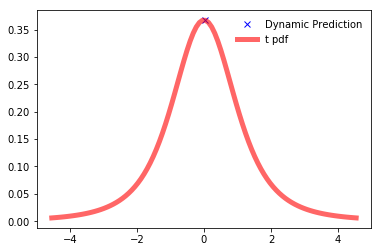

In [35]:
df = 3
fig, ax = plt.subplots(1, 1)
x = np.linspace(t.ppf(0.01, df),
t.ppf(0.99, df), 100)
ax.plot(t_val, t.pdf(t_val, df), 'bx', label='Dynamic Prediction')
ax.plot(x, t.pdf(x, df), 'r-', lw=5, alpha=0.6, label='t pdf')
ax.legend(loc='best', frameon=False)
plt.show()

In [33]:
t.pdf(t_val, 3)

0.3671972934370672